# 1. Imports, Random Seed, Data Load

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import random

In [82]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
np.random.seed(42)
random.seed(42)

In [83]:
df = pd.read_csv('ai_job_dataset.csv')

# 2. Quick Look

In [84]:
print("A peek at the data:")
display(df.sample(5))

A peek at the data:


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
11499,AI11500,NLP Engineer,138919,USD,SE,FL,Denmark,S,Denmark,100,"SQL, Deep Learning, Data Visualization",Associate,9,Healthcare,2024-04-22,2024-07-04,2000,7.1,Cloud AI Solutions
6475,AI06476,ML Ops Engineer,187208,USD,SE,CT,Switzerland,S,Switzerland,50,"Tableau, Statistics, Python, Hadoop",Master,9,Gaming,2024-05-09,2024-06-23,2306,5.5,Future Systems
13167,AI13168,AI Research Scientist,158264,USD,SE,CT,Singapore,M,Singapore,100,"Linux, Statistics, Python, Git, TensorFlow",Bachelor,9,Consulting,2024-04-24,2024-06-10,601,5.8,TechCorp Inc
862,AI00863,AI Research Scientist,139174,USD,SE,CT,Norway,M,Norway,0,"Python, GCP, NLP",Bachelor,7,Transportation,2025-04-21,2025-05-10,724,8.5,DataVision Ltd
5970,AI05971,AI Consultant,61622,GBP,EN,FT,United Kingdom,M,United Kingdom,0,"SQL, Java, Hadoop, GCP, Git",PhD,1,Transportation,2024-09-27,2024-11-06,2013,9.9,Neural Networks Co


In [85]:
print(f"\nRows: {df.shape[0]} | Columns: {df.shape[1]}")
df.info()


Rows: 15000 | Columns: 19
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_dat

# 3. Clean-up & Feature Engineering

In [86]:
df['posting_date'] = pd.to_datetime(df['posting_date'], errors='coerce')
df['application_deadline'] = pd.to_datetime(df['application_deadline'], errors='coerce')
for col in ['experience_level', 'employment_type', 'company_size', 'education_required', 'industry']:
    df[col] = df[col].astype(str).str.title()
df['posting_year'] = df['posting_date'].dt.year
df['posting_month'] = df['posting_date'].dt.month
df['deadline_gap_days'] = (df['application_deadline'] - df['posting_date']).dt.days
df['remote_ratio'] = df['remote_ratio'].fillna(0)

# 4. Currency Normalization

In [87]:
cur_map = {'USD':1, 'EUR':1.09, 'GBP':1.27}
df['salary_converted'] = df['salary_usd']
for cur, rate in cur_map.items():
    df.loc[df['salary_currency'] == cur, 'salary_converted'] = df.loc[df['salary_currency'] == cur, 'salary_usd'] * rate

# 5. Missing Values & Duplicates

In [88]:
print("Missing values:")
print(df.isnull().mean().sort_values(ascending=False))
print("Duplicated rows:", df.duplicated().sum())
df = df.drop_duplicates()

Missing values:
job_id                    0.0
years_experience          0.0
deadline_gap_days         0.0
posting_month             0.0
posting_year              0.0
company_name              0.0
benefits_score            0.0
job_description_length    0.0
application_deadline      0.0
posting_date              0.0
industry                  0.0
education_required        0.0
job_title                 0.0
required_skills           0.0
remote_ratio              0.0
employee_residence        0.0
company_size              0.0
company_location          0.0
employment_type           0.0
experience_level          0.0
salary_currency           0.0
salary_usd                0.0
salary_converted          0.0
dtype: float64
Duplicated rows: 0


# 6. Stats

In [89]:
display(df.describe(include='all').T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
job_id,15000,15000,AI00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
job_title,15000,20,Machine Learning Researcher,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary_usd,15000.0,NaN,NaN,NaN,115348.965133,32519.0,70179.75,99705.0,146408.5,399095.0,60260.940438
salary_currency,15000,3,USD,11957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
experience_level,15000,4,Mi,3781,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,15000,4,Ft,3812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_location,15000,20,Germany,814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_size,15000,3,S,5007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employee_residence,15000,20,Sweden,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
remote_ratio,15000.0,NaN,NaN,NaN,49.483333,0.0,0.0,50.0,100.0,100.0,40.812712


# 7. Salary Distribution

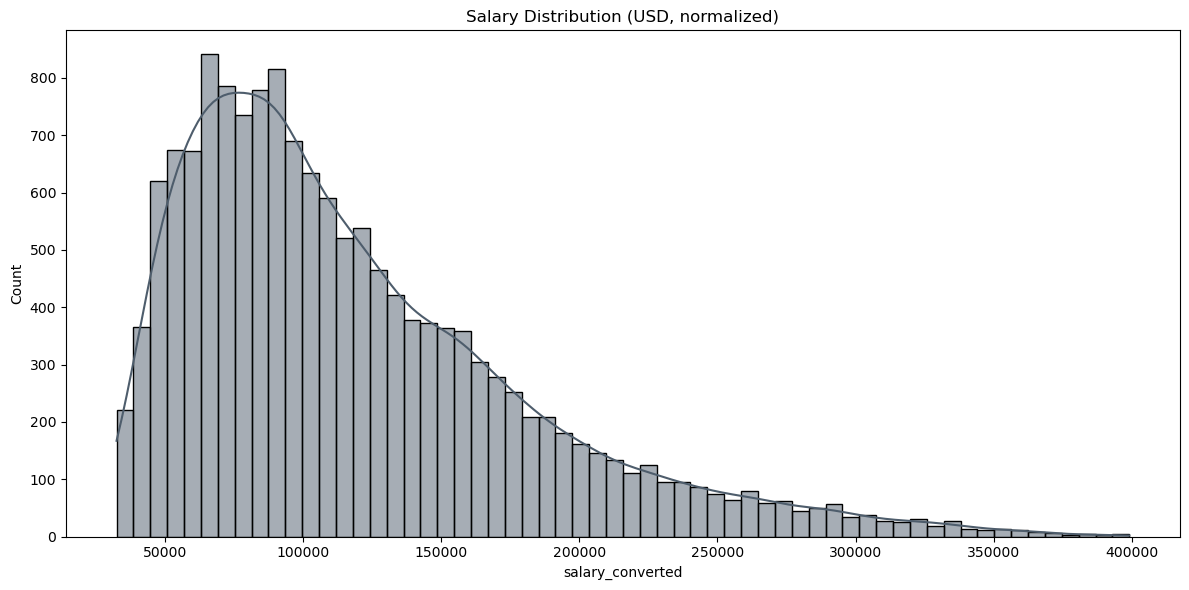

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(df['salary_converted'], bins=60, kde=True, color='#4e5d6c')
plt.title('Salary Distribution (USD, normalized)')
plt.tight_layout()
plt.show()

# 8. Salary Boxplot

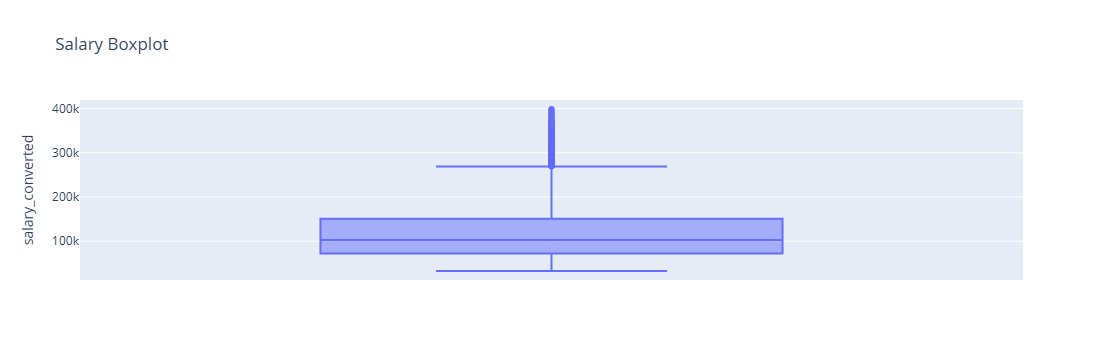

In [91]:
fig = px.box(df, y='salary_converted', points='outliers', title='Salary Boxplot')
fig.show()

# 9. Experience & Education

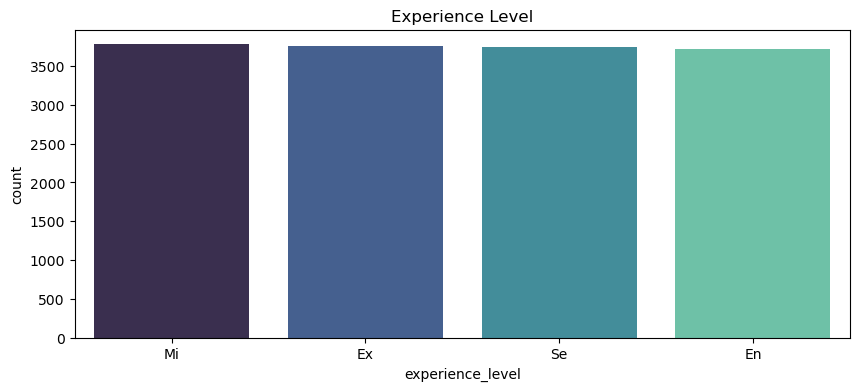

In [92]:
plt.figure(figsize=(10,4))
sns.countplot(x='experience_level', data=df, order=df['experience_level'].value_counts().index, palette='mako')
plt.title('Experience Level')
plt.show()

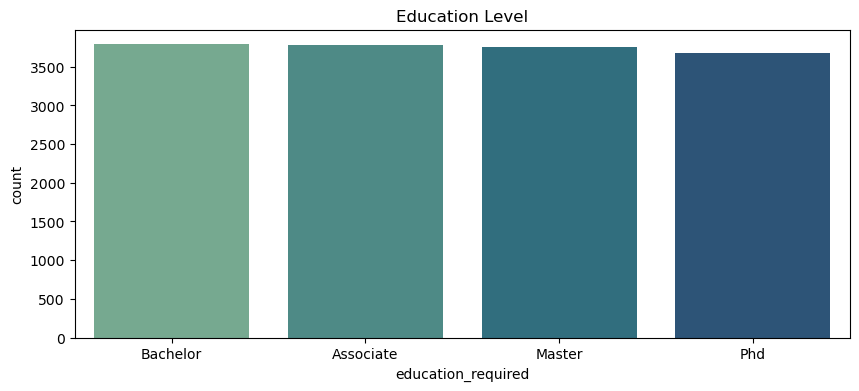

In [93]:
plt.figure(figsize=(10,4))
sns.countplot(x='education_required', data=df, order=df['education_required'].value_counts().index, palette='crest')
plt.title('Education Level')
plt.show()

# 10. Job Titles: Which Pay Best/Worst?

Top 10 best-paying job titles:
                            count           mean
job_title                                      
AI Specialist                728  123709.989025
Machine Learning Engineer    772  122305.150479
Head of AI                   765  122038.492157
AI Architect                 771  121001.198599
AI Research Scientist        756  120593.156521
Robotics Engineer            759  120249.547971
Principal Data Scientist     734  120156.294087
Research Scientist           742  119375.800997
Data Engineer                749  119261.774513
Data Scientist               720  119179.057208

10 least-paying job titles:
                              count           mean
job_title                                        
AI Product Manager             743  118820.905707
ML Ops Engineer                725  118520.269986
AI Software Engineer           784  117721.398393
AI Consultant                  704  116963.703452
Computer Vision Engineer       724  116875.015221
Deep Learnin

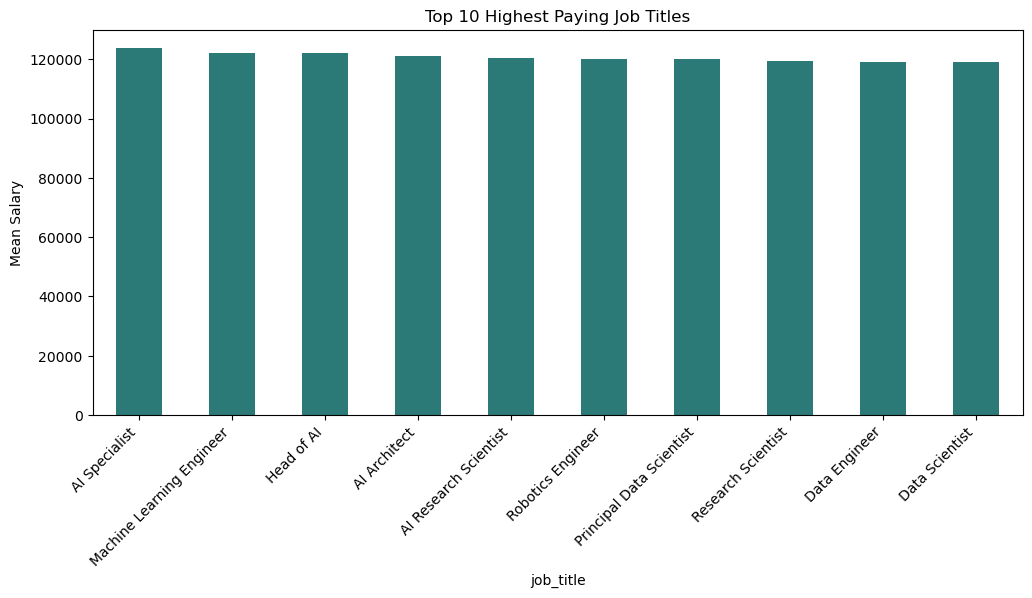

In [94]:
grouped = df.groupby('job_title')['salary_converted'].agg(['count', 'mean']).sort_values('mean', ascending=False)
print("Top 10 best-paying job titles:\n", grouped.head(10))
print("\n10 least-paying job titles:\n", grouped.tail(10))
plt.figure(figsize=(12,5))
grouped.head(10)['mean'].plot(kind='bar', color='#2b7a78')
plt.title('Top 10 Highest Paying Job Titles')
plt.ylabel('Mean Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

# 11. Most Common Job Title Per Country

In [59]:
most_common_titles = df.groupby('company_location')['job_title'].agg(lambda x: x.value_counts().index[0])
print("Most common job per country:\n", most_common_titles.head(10))

Most common job per country:
 company_location
Australia          AI Research Scientist
Austria                   Data Scientist
Canada       Autonomous Systems Engineer
China        Autonomous Systems Engineer
Denmark            AI Research Scientist
Finland      Autonomous Systems Engineer
France              AI Software Engineer
Germany                       Head of AI
India                      Data Engineer
Ireland                       Head of AI
Name: job_title, dtype: object


# 12. Categorical Distributions

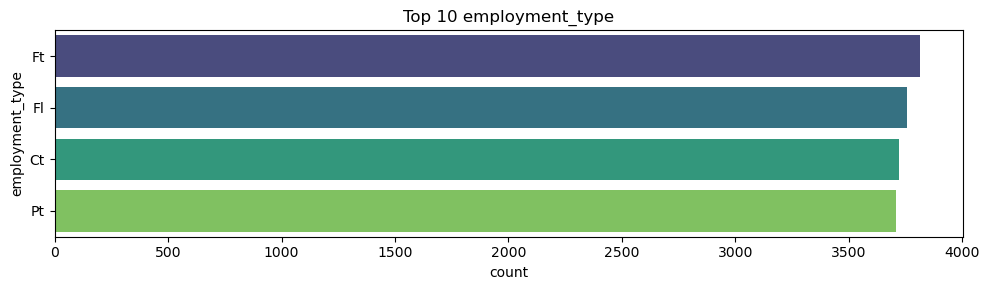

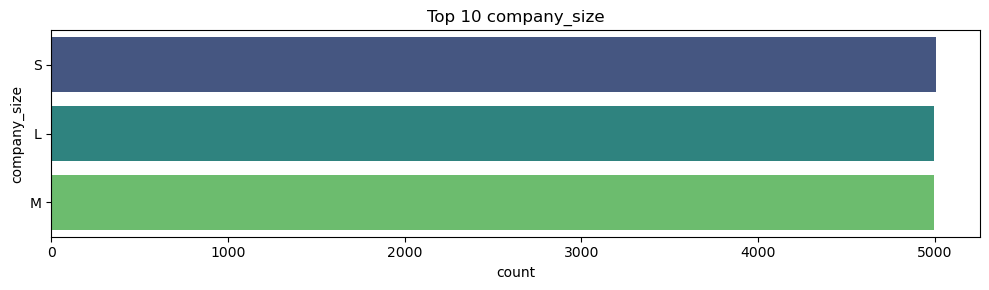

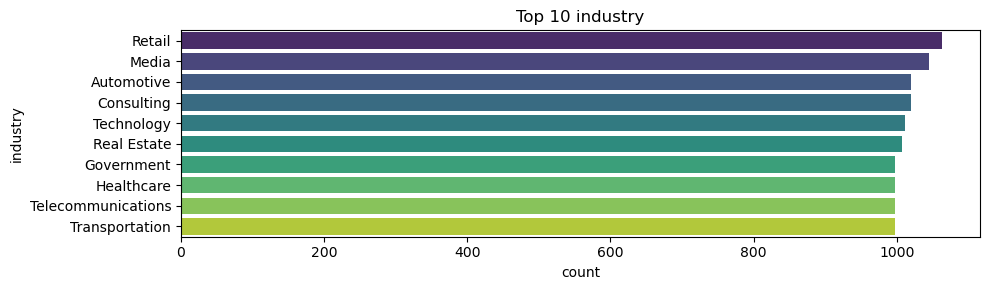

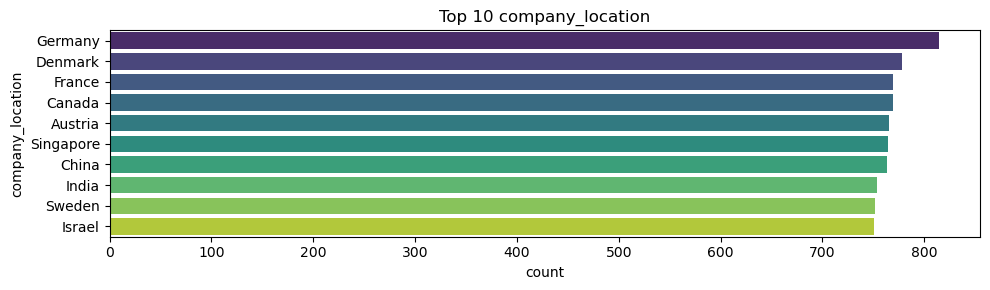

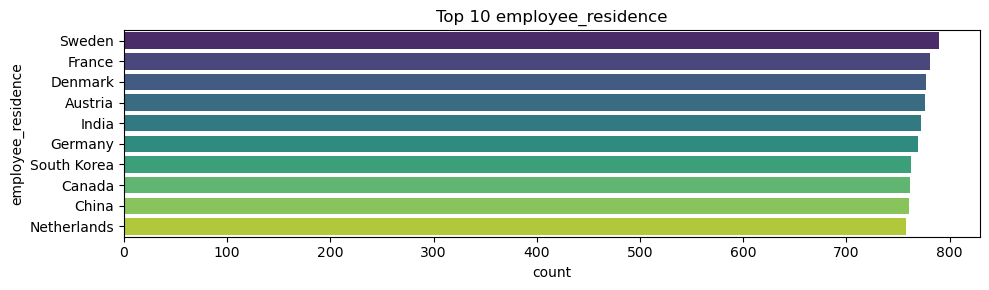

In [60]:
cat_feats = ['employment_type', 'company_size', 'industry', 'company_location', 'employee_residence']
for col in cat_feats:
    plt.figure(figsize=(10,3))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index[:10], palette='viridis')
    plt.title(f'Top 10 {col}')
    plt.tight_layout()
    plt.show()

# 13. Salary by Experience, Education, Company Size

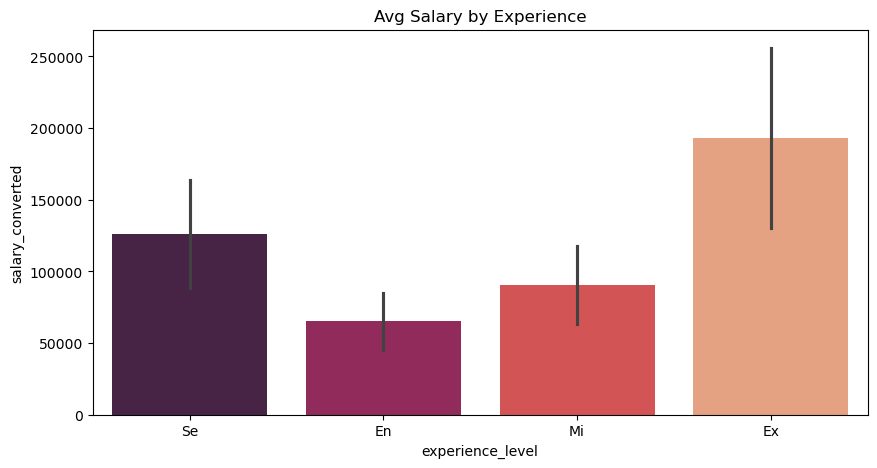

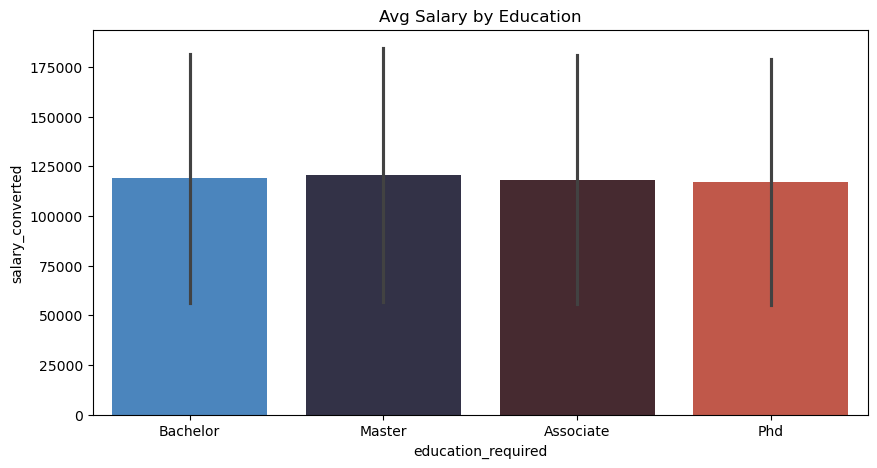

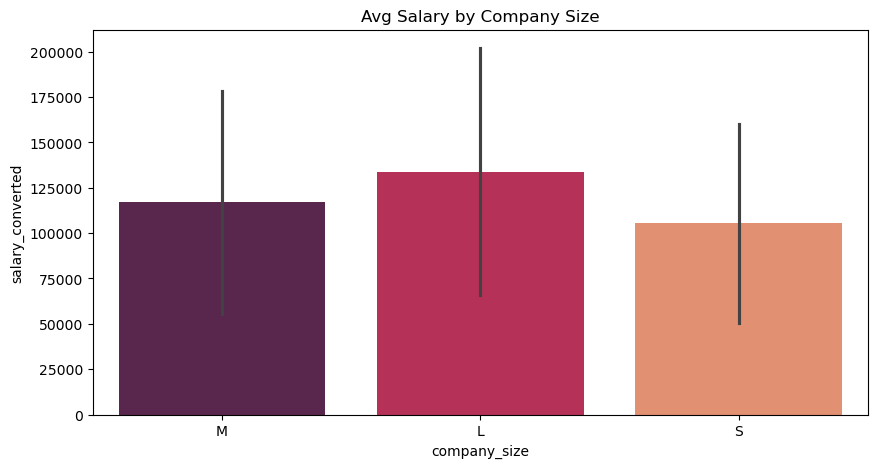

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(x='experience_level', y='salary_converted', data=df, estimator=np.mean, ci='sd', palette='rocket')
plt.title('Avg Salary by Experience')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='education_required', y='salary_converted', data=df, estimator=np.mean, ci='sd', palette='icefire')
plt.title('Avg Salary by Education')
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='company_size', y='salary_converted', data=df, estimator=np.mean, ci='sd',  palette='rocket')
plt.title('Avg Salary by Company Size')
plt.show()

# 14. Salary by Industry & Country

In [62]:
top_ind = df.groupby('industry')['salary_converted'].median().sort_values(ascending=False).head(12)
fig = px.bar(top_ind, orientation='h', title='Top Industries by Median Salary', labels={'value':'Median Salary', 'industry':'Industry'}, color=top_ind.values)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

In [ ]:
top_country = df.groupby('company_location')['salary_converted'].median().sort_values(ascending=False).head(12)
fig = px.bar(top_country, orientation='h', title='Top Company Locations by Median Salary', labels={'value':'Median Salary', 'company_location':'Location'}, color=top_country.values)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# 15. Remote Ratio vs Salary

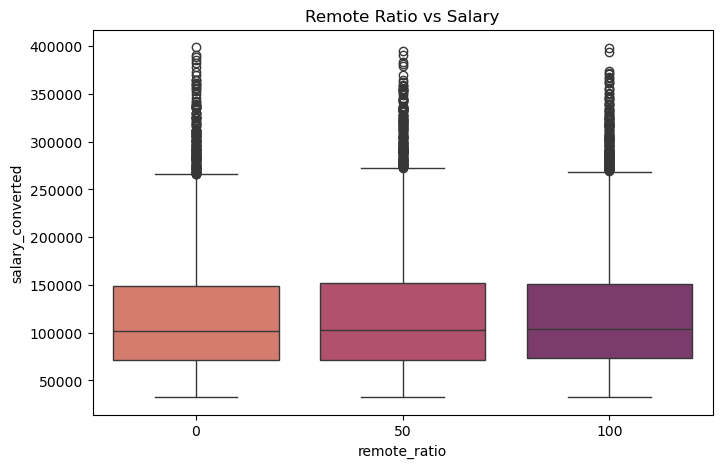

In [63]:
plt.figure(figsize=(8,5))
sns.boxplot(x='remote_ratio', y='salary_converted', data=df, palette='flare')
plt.title('Remote Ratio vs Salary')
plt.show()

# 16. Skills Analysis

In [64]:
skills = df['required_skills'].dropna().str.split(', ')
exploded = skills.explode()
top_skills = exploded.value_counts().head(20)
fig = px.bar(top_skills, orientation='h', title='Top 20 Most In-Demand Skills', labels={'value':'Count', 'index':'Skill'})
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# 17. Most In-Demand Skills for Remote Jobs

In [65]:
remote_jobs = df[df['remote_ratio'] >= 50]
remote_skills = remote_jobs['required_skills'].dropna().str.split(', ').explode()
top_remote_skills = remote_skills.value_counts().head(15)
print("Top 15 remote job skills:\n", top_remote_skills)

Top 15 remote job skills:
 required_skills
Python                2964
SQL                   2268
Kubernetes            1993
TensorFlow            1984
PyTorch               1829
Scala                 1821
Linux                 1811
Git                   1749
Java                  1725
GCP                   1649
Hadoop                1632
Tableau               1565
Computer Vision       1523
Data Visualization    1517
R                     1506
Name: count, dtype: int64


# 18. Top Skills Per Industry

In [66]:
industry_skill = {}
for ind in df['industry'].unique():
    skills = df[df['industry'] == ind]['required_skills'].dropna().str.split(', ').explode().value_counts()
    if not skills.empty:
        industry_skill[ind] = skills.index[0]
industry_skill = pd.Series(industry_skill)
print("Most common skill per industry:\n", industry_skill.head(10))

Most common skill per industry:
 Automotive            Python
Media                 Python
Education             Python
Consulting            Python
Healthcare            Python
Gaming                Python
Government            Python
Telecommunications    Python
Manufacturing         Python
Energy                Python
dtype: object


# 19. Salary vs. Years of Experience (Scatter + Regression)

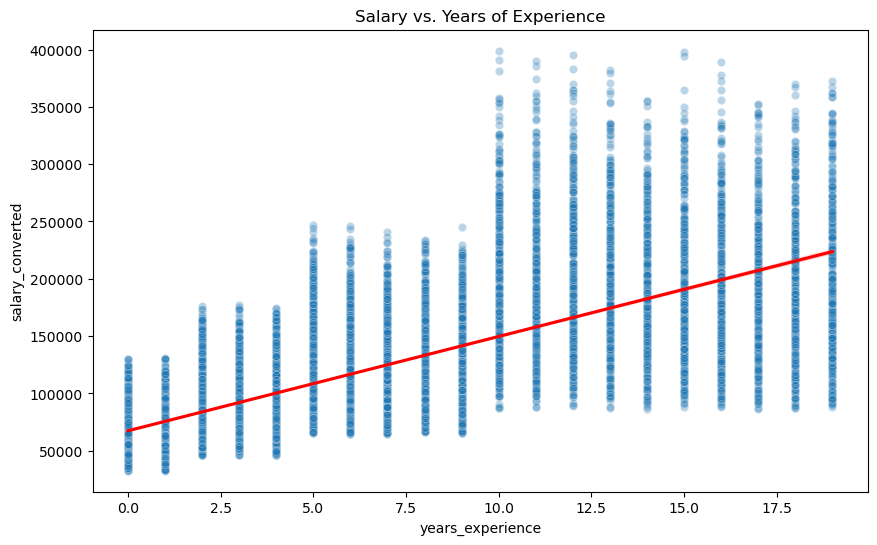

In [67]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='years_experience', y='salary_converted', data=df, alpha=0.3)
sns.regplot(x='years_experience', y='salary_converted', data=df, scatter=False, color='red')
plt.title('Salary vs. Years of Experience')
plt.show()

# 20. Company Size vs Remote Ratio (Heatmap)

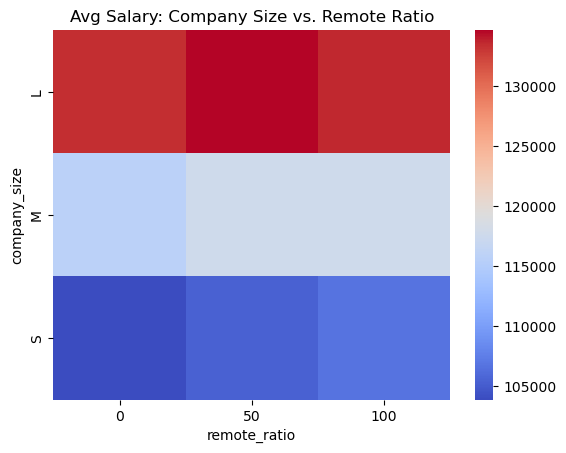

In [68]:
pivot = pd.pivot_table(df, index='company_size', columns='remote_ratio', values='salary_converted', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Avg Salary: Company Size vs. Remote Ratio')
plt.show()

# 21. Posting Trend: Moving Average

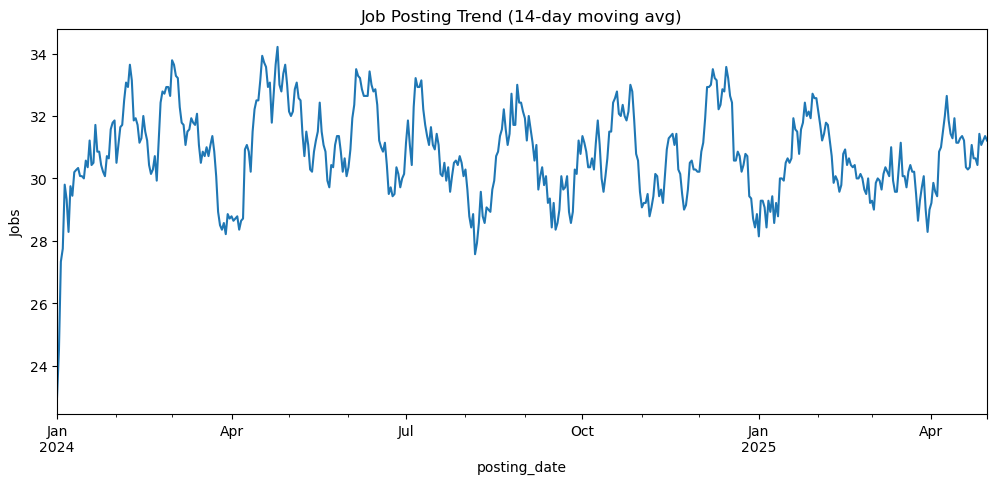

In [69]:
trend = df.groupby('posting_date').size().sort_index()
plt.figure(figsize=(12,5))
trend.rolling(14, min_periods=1).mean().plot()
plt.title('Job Posting Trend (14-day moving avg)')
plt.ylabel('Jobs')
plt.show()

# 22. Outlier Table

In [70]:
q1 = df['salary_converted'].quantile(0.25)
q3 = df['salary_converted'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['salary_converted'] < (q1 - 1.5 * iqr)) | (df['salary_converted'] > (q3 + 1.5 * iqr))]
print("Extreme salary outliers (sample):")
display(outliers[['job_title', 'salary_converted', 'company_location', 'experience_level']].sample(5))

Extreme salary outliers (sample):


,job_title,salary_converted,company_location,experience_level
12916,AI Consultant,287177.94,Germany,Ex
9067,Head of AI,343803.00,United States,Ex
1415,Data Analyst,361541.00,Denmark,Ex
11938,Robotics Engineer,346789.00,Norway,Ex
2951,ML Ops Engineer,320213.00,Denmark,Ex


# 23. Fun Fact

In [71]:
facts = [
    f"Did you know? The highest normalized salary in this dataset is ${df['salary_converted'].max():,.0f}.",
    f"Most popular skill: {top_skills.index[0]}.",
    f"Longest deadline gap: {df['deadline_gap_days'].max()} days.",
    f"Country with most jobs posted: {df['company_location'].value_counts().idxmax()}."
]
print(random.choice(facts))

Did you know? The highest normalized salary in this dataset is $399,095.


# 24. Correlation Heatmap

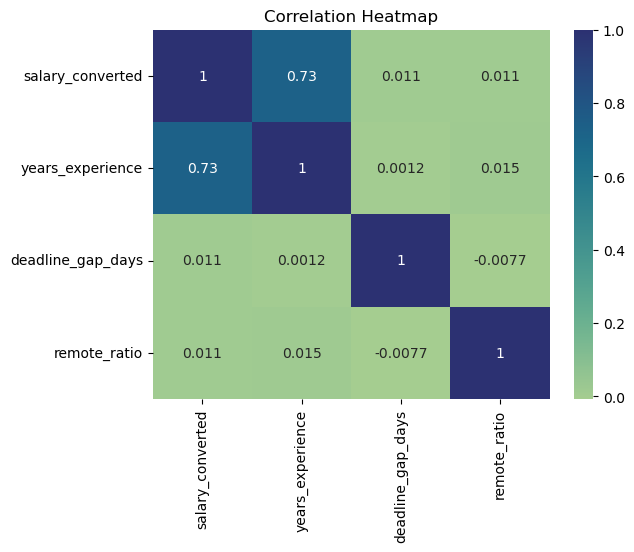

In [72]:
corr = df[['salary_converted', 'years_experience', 'deadline_gap_days', 'remote_ratio']].corr()
sns.heatmap(corr, annot=True, cmap='crest')
plt.title('Correlation Heatmap')
plt.show()

# 25. Interactive Parameter Cell

In [73]:
# Try changing 'industry' to your favorite.
your_industry = 'Finance'
filtered = df[df['industry'] == your_industry]
print(f"Avg salary in {your_industry}: ${filtered['salary_converted'].mean():,.0f} (n={filtered.shape[0]})")

Avg salary in Finance: $118,803 (n=984)
